In [12]:
%matplotlib inline
import main
import spark_greedy
import matplotlib.pyplot as plt
import random
import math

#VM bs
import findspark
findspark.init()

from pyspark import SparkContext

In [3]:
sc = SparkContext("local", "test_run")

In [46]:
def node_swap(total_nodes,current_nodes,swap_number):
    new_nodes = set(random.sample(total_nodes.difference(current_nodes),swap_number))
    kept_nodes = set(random.sample(current_nodes,len(current_nodes) - swap_number))
    return new_nodes | kept_nodes

def imp_mcmc(g,k,f=main.cascade_trials):
    
    # iteration variables
    i = 0
    j = 0
    
    # annealing parameters
    T = 1
    a = 0.9
    depth = 10
    N = 100
    swap = 1
    
    all_nodes = set(g.nodes())
    nodes = set(random.sample(all_nodes,k))
    
    # Here E = activated nodes, we want to find max E (NOT min E)
    E1 = f(N,nodes,g,depth)['mean']
    max_E = E1
    temp_max_E = E1
    max_nodes = nodes
    temp_max_nodes = nodes
    accepted = []
    chain = 0

    while i < 300:

        if j > 49:
            T = T*a
            j = 0

        if chain > 5000:
            #N += 1
            T = 1
            chain = 0
            nodes = set(random.sample(all_nodes,k))
            E1 = f(N, nodes, g, depth)['mean']
            temp_max_E = E1
            temp_max_nodes = nodes
            print "chain reset"

        new_nodes = node_swap(all_nodes,nodes,swap)
        E2 = f(N, new_nodes, g, depth)['mean']
        
        u = random.uniform(0,1)
        
        # Boltzman distribution
        if u <= math.exp((E2 - E1)/T):
            
            if E2 > max_E:
                max_E = E2
                max_nodes = new_nodes
                
            if E2 < temp_max_E:
                temp_max_E = E2
                chain = 0

            j += 1
            nodes = new_nodes
            E1 = E2

        else:
            chain += 1

        accepted.append(E1)
        i += 1

    plt.plot(accepted)
    print max_nodes
    print max_E


In [47]:
NC_digraph = main.import_graph("nc_mini.json")

set([u'VhI6xyylcAxi0wOy2HOX3w', u'-_1ctLaz3jhPYc12hKXsEQ'])
42.07


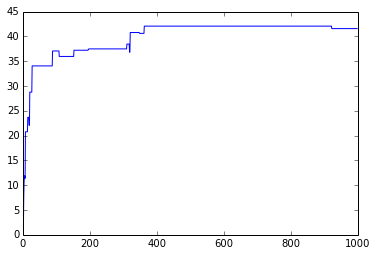

In [51]:
imp_mcmc(NC_digraph,2)

set([u'VhI6xyylcAxi0wOy2HOX3w', u'eFxX1tSNLmVkAP9kNv2--Q', u'ts7EG6Zv2zdMDg29nyqGfA'])
47.88


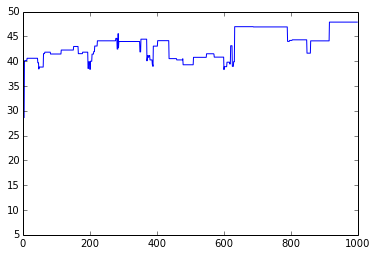

In [52]:
imp_mcmc(NC_digraph,3)

set([u'VhI6xyylcAxi0wOy2HOX3w', u'LP0bl3GKToABt3lnpSvA2w', u'3GteArKIVRlJZjjRqqwgaQ', u'ts7EG6Zv2zdMDg29nyqGfA'])
51.54


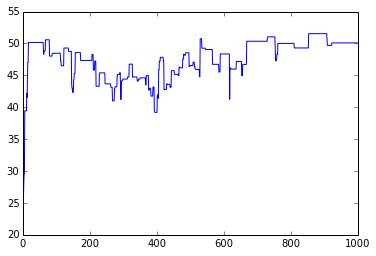

In [53]:
imp_mcmc(NC_digraph,4)

set([u'VhI6xyylcAxi0wOy2HOX3w', u'-_1ctLaz3jhPYc12hKXsEQ', u'3RybmJO-xvNhP7_SZBhkfg', u'pNMUZiL-TaQojaEygESgwQ', u'ts7EG6Zv2zdMDg29nyqGfA'])
55.16


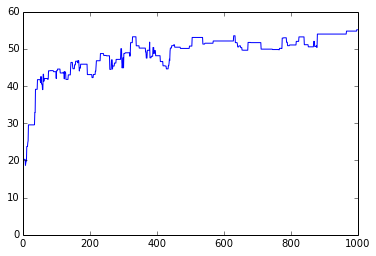

In [54]:
imp_mcmc(NC_digraph,5)